# Simple Linear Regression Model with Hyperledger Fabric data

Import modules

In [168]:
import requests as rqt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Get data from Hyperledger Fabric Network

In [169]:
data = rqt.get("http://localhost:8000/api/getAllAssets")
jsonifiedData = data.json()
jsonifiedData["response"]

[{'force': 10, 'stretching': 246.04, 'key': '18652'},
 {'force': 7, 'stretching': 185.29, 'key': '20255'},
 {'force': 12, 'stretching': 310.56, 'key': '30402'},
 {'force': 13, 'stretching': 330.49, 'key': '35482'},
 {'force': 1, 'stretching': 24.5, 'key': '45402'},
 {'force': 5, 'stretching': 128.77, 'key': '48216'},
 {'force': 9, 'stretching': 220.42, 'key': '53682'},
 {'force': 14, 'stretching': 392.83, 'key': '54109'},
 {'force': 8, 'stretching': 210.35, 'key': '56431'},
 {'force': 6, 'stretching': 152.23, 'key': '63222'},
 {'force': 4, 'stretching': 96.25, 'key': '73058'},
 {'force': 2, 'stretching': 52.15, 'key': '76055'},
 {'force': 3, 'stretching': 73.28, 'key': '87622'},
 {'force': 11, 'stretching': 262.34, 'key': '88627'},
 {'force': 15, 'stretching': 410.32, 'key': '98352'}]

Make pandas dataframe from data.

In [184]:
dataframe = pd.DataFrame(jsonifiedData["response"])
dataframe = dataframe.sort_values(by = ["force"])
dataframe

,force,stretching,key
4,1,24.50,45402
11,2,52.15,76055
12,3,73.28,87622
10,4,96.25,73058
5,5,128.77,48216
9,6,152.23,63222
1,7,185.29,20255
8,8,210.35,56431
6,9,220.42,53682
0,10,246.04,18652


In [185]:
X = dataframe.iloc[:, 0].values
Y = dataframe.iloc[:, 1].values

Generate training and test sets.

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

Create a LinearRegression instance and fit the model with the training sets.

In [187]:
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

LinearRegression()

Predict results of trained model in testing set.

In [188]:
Y_pred = regressor.predict(X_test.reshape(-1, 1))

Visualization of model in training set.

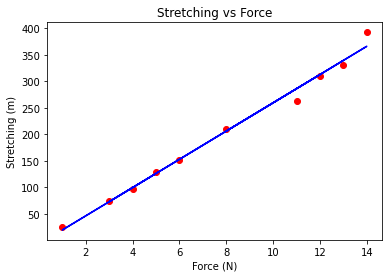

In [189]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train.reshape(-1, 1)), color = 'blue')
plt.title("Stretching vs Force")
plt.xlabel('Force (N)')
plt.ylabel('Stretching (m)')
plt.show()

Visualization of model applied in test set.

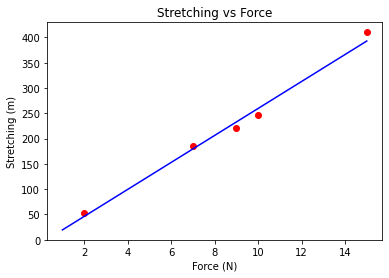

In [190]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X, regressor.predict(X.reshape(-1, 1)), color = 'blue')
plt.title("Stretching vs Force")
plt.xlabel('Force (N)')
plt.ylabel('Stretching (m)')
plt.show()

In [191]:
X_train.reshape(-1, 1)

array([[ 5],
       [ 3],
       [14],
       [11],
       [ 8],
       [12],
       [ 4],
       [ 1],
       [ 6],
       [13]])

In [192]:
regressor.coef_

array([[26.68527379]])

In [193]:
regressor.intercept_

array([-7.31660819])

In [199]:
regressor.predict(X.reshape(-1, 1))

array([[ 19.3686656 ],
       [ 46.05393939],
       [ 72.73921318],
       [ 99.42448698],
       [126.10976077],
       [152.79503456],
       [179.48030835],
       [206.16558214],
       [232.85085593],
       [259.53612972],
       [286.22140351],
       [312.9066773 ],
       [339.59195109],
       [366.27722488],
       [392.96249867]])

In [201]:
regressor.predict([[2]])

array([[46.05393939]])